In [1]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imutils import build_montages
from imutils import paths
import random
import cv2

In [3]:
Data = pd.read_csv(r"G:\PYTHON\FinalYr_Phase-2\Meta_data.csv")

In [4]:
Data.head()

,Unnamed: 0,path,value
0,0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0
1,1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0
2,2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0
3,3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0
4,4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0


In [5]:
Data.drop(Data.columns[0], axis=1, inplace=True)

In [6]:
Data.head()

,path,value
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0


In [7]:
Data['split'] = np.random.randn(Data.shape[0], 1)

msk = np.random.rand(len(Data)) <= 0.8

train = Data[msk]
test = Data[~msk]

In [8]:
print(train.value.value_counts())
print(test.value.value_counts())

0    2920
2    2828
1    1623
Name: value, dtype: int64
0    696
2    672
1    422
Name: value, dtype: int64


In [9]:
train.reset_index(inplace=True)

In [10]:
train.drop(train.columns[0], axis=1, inplace=True)
train.head()

C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,path,value,split
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0,-1.376972
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0,-1.415810
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1003.png,0,-0.862758
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1004.png,0,-0.114476
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1005.png,0,1.010237


In [11]:
data = []
image_size = 224
test_pixel_data = []
import matplotlib.pyplot as plt
from PIL import Image


for i in range(len(train)):
    img_array = Image.open(train['path'][i])
    new_img_array = np.array(img_array)
    if new_img_array.ndim == 2:
        new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
    new_img_array = cv2.resize(new_img_array,(224,224))
    #print(i,np.array(new_img_array).shape,train['value'][i])
    data.append([new_img_array, train['value'][i]])


In [12]:
test.reset_index(inplace=True)

In [13]:
test.drop(test.columns[0], axis=1, inplace=True)
test.head()

C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,path,value,split
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0,0.752271
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0,-0.246819
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0,2.014680
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1002.png,0,-0.137689
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1010.png,0,-1.264896


In [14]:
for i in range(len(test)):
    img_array = Image.open(test['path'][i])
    new_img_array = np.array(img_array)
    if new_img_array.ndim == 2:
        new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
    new_img_array = cv2.resize(new_img_array,(224,224))
    test_pixel_data.append(new_img_array)

In [15]:
np.random.shuffle(data)
x = []
y = []

counter = 406
count = 0

for image in data:
    try:
        x.append(image[0])
        y.append(image[1])
    except:
        print(count)
    count += 1

# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

In [16]:
np.unique(y, return_counts=True)

(array([0, 1, 2], dtype=int64), array([2920, 1623, 2828], dtype=int64))

In [17]:
pd.Series(y).value_counts()

0    2920
2    2828
1    1623
dtype: int64

In [18]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state = 42,stratify=y)

In [19]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [20]:
test_pixel_data = np.array(test_pixel_data)

test_pixel_data = test_pixel_data/255

print(X_train.shape,X_val.shape,test_pixel_data.shape)

(5896, 224, 224, 3) (1475, 224, 224, 3) (1790, 224, 224, 3)


In [21]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(X_train,y_train,batch_size=8)

val_generator = val_datagen.flow(X_val,y_val,batch_size=8)

In [22]:
print(X_train.shape,y_train.shape,X_val.shape)

(5896, 224, 224, 3) (5896, 3) (1475, 224, 224, 3)


In [23]:
from tensorflow.keras.applications import VGG16,InceptionV3,DenseNet201
from keras.layers import *
from keras.models import Sequential
from keras.regularizers import *
from tensorflow.keras.optimizers import Adam

In [24]:
def build_model():
    model = Sequential()

    conv_base = VGG16(input_shape=(224,224,3), include_top=False, pooling='max',weights='imagenet')
    model.add(conv_base)
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
    model.add(BatchNormalization())
  # model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
  # model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
  # model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax'))
    for layer in model.layers:
        layer.trainable = True
 
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy',"Precision","Recall"])

    return model

In [25]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=3, min_lr=1e-5, verbose=0),
tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=10, verbose=1, mode='auto')]

In [26]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 2048)              1050624   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 15,781,699
Trainable params: 15,776,579
Non-trainable params: 5,120
_________________________________________________________________


C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [27]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time
Tensorboard = TensorBoard(log_dir="G:\PYTHON\FinalYr_Phase-2\logs\{}".format(time()))

In [28]:
%%timeit -n1 -r1 
with tf.device("GPU"):
    model.fit(train_generator,steps_per_epoch=87,epochs=100,validation_data=val_generator,validation_steps=22,callbacks=[cbs,Tensorboard])

Epoch 1/100
87/87 [==============================] - 61s 460ms/step - loss: 235.3554 - accuracy: 0.6810 - precision: 0.7011 - recall: 0.6437 - val_loss: 208.7334 - val_accuracy: 0.2273 - val_precision: 0.2273 - val_recall: 0.2273
Epoch 2/100
87/87 [==============================] - 37s 426ms/step - loss: 181.6946 - accuracy: 0.7572 - precision: 0.7761 - recall: 0.7371 - val_loss: 164.2392 - val_accuracy: 0.4318 - val_precision: 0.4318 - val_recall: 0.4318
Epoch 3/100
87/87 [==============================] - 37s 431ms/step - loss: 134.7502 - accuracy: 0.7787 - precision: 0.7919 - recall: 0.7601 - val_loss: 144.7982 - val_accuracy: 0.2841 - val_precision: 0.2841 - val_recall: 0.2841
Epoch 4/100
87/87 [==============================] - 32s 373ms/step - loss: 95.9736 - accuracy: 0.8118 - precision: 0.8241 - recall: 0.7945 - val_loss: 104.9851 - val_accuracy: 0.3807 - val_precision: 0.3807 - val_recall: 0.3807
Epoch 5/100
87/87 [==============================] - 36s 419ms/step - loss: 66.10

Epoch 20/100
87/87 [==============================] - 38s 433ms/step - loss: 2.0917 - accuracy: 0.8319 - precision: 0.8338 - recall: 0.8218 - val_loss: 13.8005 - val_accuracy: 0.4375 - val_precision: 0.4375 - val_recall: 0.4375
Epoch 21/100
87/87 [==============================] - 37s 429ms/step - loss: 1.5844 - accuracy: 0.8865 - precision: 0.8939 - recall: 0.8836 - val_loss: 8.6226 - val_accuracy: 0.5568 - val_precision: 0.5568 - val_recall: 0.5568
Epoch 22/100
87/87 [==============================] - 38s 433ms/step - loss: 1.4157 - accuracy: 0.8865 - precision: 0.8871 - recall: 0.8807 - val_loss: 4.3427 - val_accuracy: 0.4545 - val_precision: 0.4545 - val_recall: 0.4545
Epoch 23/100
87/87 [==============================] - 38s 433ms/step - loss: 1.1947 - accuracy: 0.8980 - precision: 0.9064 - recall: 0.8908 - val_loss: 5.5737 - val_accuracy: 0.2670 - val_precision: 0.2670 - val_recall: 0.2670
Epoch 24/100
87/87 [==============================] - 37s 430ms/step - loss: 1.3900 - accur

Epoch 39/100
87/87 [==============================] - 38s 433ms/step - loss: 0.4308 - accuracy: 0.9397 - precision: 0.9459 - recall: 0.9296 - val_loss: 0.5233 - val_accuracy: 0.9034 - val_precision: 0.9181 - val_recall: 0.8920
Epoch 40/100
87/87 [==============================] - 38s 433ms/step - loss: 0.4612 - accuracy: 0.9368 - precision: 0.9433 - recall: 0.9325 - val_loss: 12.1667 - val_accuracy: 0.3750 - val_precision: 0.3750 - val_recall: 0.3750
Epoch 41/100
87/87 [==============================] - 37s 431ms/step - loss: 0.4796 - accuracy: 0.9181 - precision: 0.9232 - recall: 0.9152 - val_loss: 3.4343 - val_accuracy: 0.2500 - val_precision: 0.2500 - val_recall: 0.2500
Epoch 42/100
87/87 [==============================] - 38s 434ms/step - loss: 0.5403 - accuracy: 0.9239 - precision: 0.9260 - recall: 0.9167 - val_loss: 0.6756 - val_accuracy: 0.9148 - val_precision: 0.9186 - val_recall: 0.8977
Epoch 43/100
87/87 [==============================] - 37s 429ms/step - loss: 0.5720 - accur

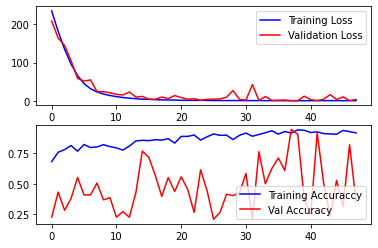

In [29]:
fig, ax  = plt.subplots(2,1)

#Loss
ax[0].plot(model.history.history['loss'], color = 'b', label='Training Loss')
ax[0].plot(model.history.history['val_loss'], color = 'r', label='Validation Loss')
ax[0].legend()
#Accuracy
ax[1].plot(model.history.history['accuracy'], color='b', label='Training Accuraccy')
ax[1].plot(model.history.history['val_accuracy'], color='r', label='Val Accuracy')
ax[1].legend()

In [30]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [31]:
pred = model.predict(X_val/255)
predictions = np.argmax(pred,axis=1)
test_evaluation = model.evaluate(val_generator)

185/185 [==============================] - 25s 135ms/step - loss: 3.4027 - accuracy: 0.4224 - precision: 0.4224 - recall: 0.4224


In [32]:
train_evaluation = model.evaluate(train_generator)

737/737 [==============================] - 100s 136ms/step - loss: 3.3236 - accuracy: 0.4272 - precision: 0.4271 - recall: 0.4271


In [33]:
model.save("G:\\PYTHON\\FinalYr_Phase-2\\weights\\VGG16.h5")

In [34]:
Y_VAL = np.array(list(pd.DataFrame(y_val).idxmax(axis=1)))

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_VAL,predictions))
print(classification_report(Y_VAL,predictions,digits=3))

[[584   0   0]
 [297  28   0]
 [555   0  11]]
              precision    recall  f1-score   support

           0      0.407     1.000     0.578       584
           1      1.000     0.086     0.159       325
           2      1.000     0.019     0.038       566

    accuracy                          0.422      1475
   macro avg      0.802     0.369     0.258      1475
weighted avg      0.765     0.422     0.279      1475



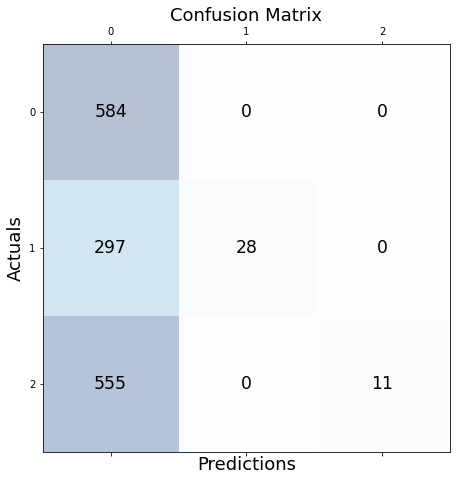

In [36]:
conf_matrix = confusion_matrix(Y_VAL,predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [37]:
from keras.models import load_model
model = load_model("G:\\PYTHON\\FinalYr_Phase-2\\weights\\Dense_net.h5")

In [38]:
%matplotlib inline
# get sample image to test.
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_covid = 'G:\\PYTHON\\Final_year_project\\Final\\covid_image_data\\covid_image_data\\Images\\COVID\\COVID-3.png'
img_normal = 'G:\\PYTHON\\FinalYr_Phase-2\\Normal\\Normal-99.png'
img_test = 'G:\\PYTHON\\FinalYr_Phase-2\\NON_COVID\\Non_COVID-15.png'

img_array = Image.open(img_test)
new_img_array = np.array(img_array)
if new_img_array.ndim == 2:
    new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
new_img_array = cv2.resize(new_img_array,(224,224))




dt = []
dt.append(new_img_array)
X = np.array(dt)
X = X/255
val = model.predict(X)
print("Prediction :",np.argmax(val,axis=1))

Prediction : [1]
